# Занятие 4

## K-nearest neighbors (KNN). Ирисы Фишера

Алгоритм наших действий:
1. Загрузка данных
2. Изучение и подготовка данных
3. Разделение данных на обучающую и тестовую выборку
4. Создание модели машинного обучения
5. Обучение модели
6. Оценка модели

Импорт библиотек

In [16]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Визуализация данных

<function matplotlib.pyplot.show(close=None, block=None)>

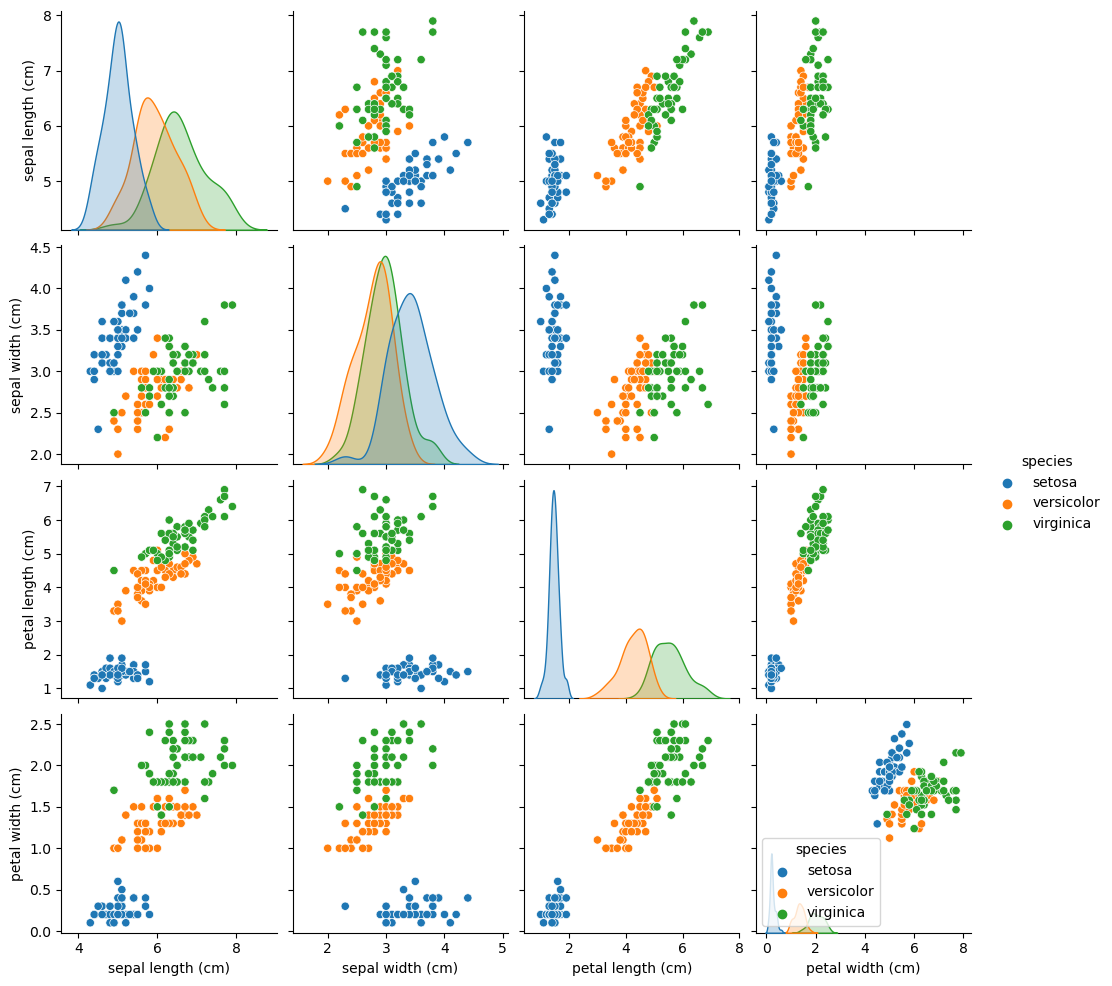

In [17]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

iris_df['species'] = iris_df['species'].map(
    {0: 'setosa', 1: 'versicolor', 2: 'virginica'})

sns.pairplot(iris_df, hue='species')
plt.show

sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)',
                hue='species', data=iris_df)
plt.show

Загрузить набор данных Iris

In [18]:
iris = load_iris()
X = iris.data
y = iris.target

Разделить данные на обучающую и тестовую выборки

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

Создание экземпляра классификатора k-ближайших соседей

In [20]:
knn = KNeighborsClassifier(n_neighbors = 3)

Обучение модели

In [21]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Предсказание результатов на тестовом наборе данных

In [22]:
y_pred = knn.predict(X_test)

Оценка модели

In [23]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## Linear regression. Пример из атомной отрасли

In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Создание симулированного набора данных
np.random.seed(42)
data_size = 100

# Симуляция параметров: рабочие часы, уровень радиации, температура и давление
hours = np.random.rand(data_size) * 10000       # рабочие часы
radiation = np.random.rand(data_size) * 100     # уровень радиации
temperature = np.random.rand(data_size) * 300   # температура
pressure = np.random.rand(data_size) * 200      # давление

# Симуляция времени до износа (целевая переменная)
wear_time = 10000 - (hours + radiation * 50 + temperature *
                     30 + pressure * 20) + np.random.rand(data_size) * 1000

# Создание DataFrame
df = pd.DataFrame({
    'Hours': hours,
    'Radiation': radiation,
    'Temperature': temperature,
    'Pressure': pressure,
    'WearTime': wear_time
})

# Разделение данных на обучающую и тестовую выборки
X = df[['Hours', 'Radiation', 'Temperature', 'Pressure']]
y = df['WearTime']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# Создание модели линейной регрессии
model = LinearRegression()

# Обучение модели
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 103089.70561320115
R^2 Score: 0.9947293312840275


Визуализация

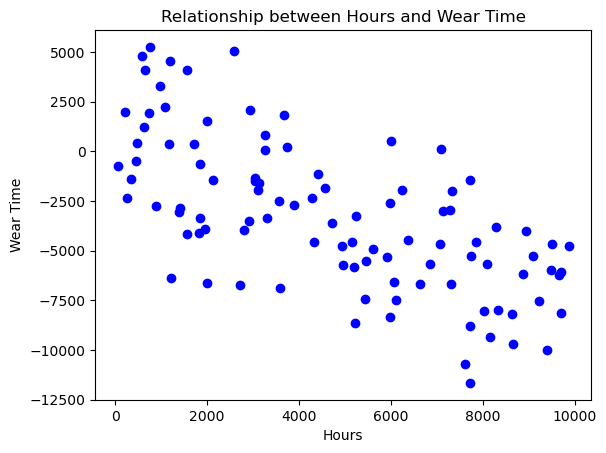

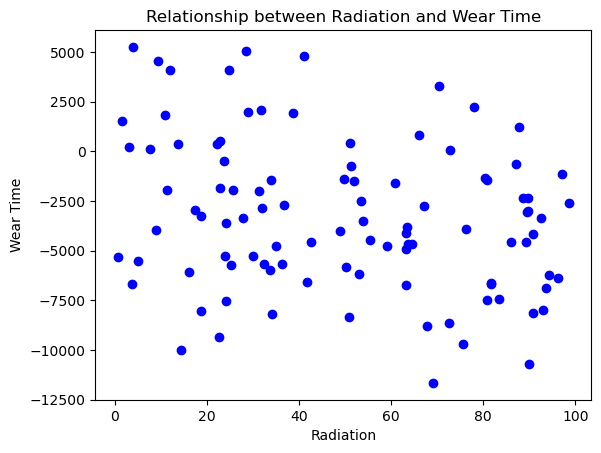

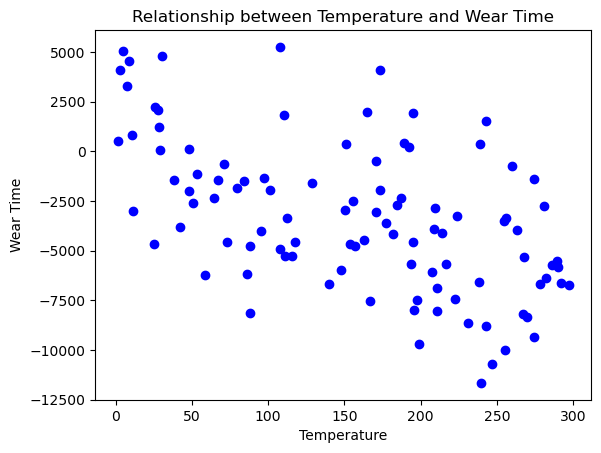

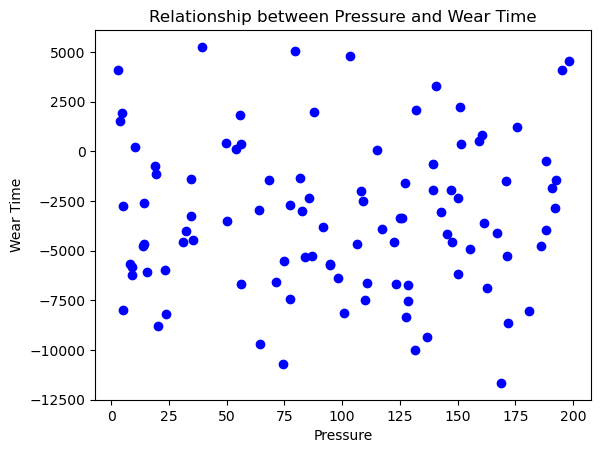

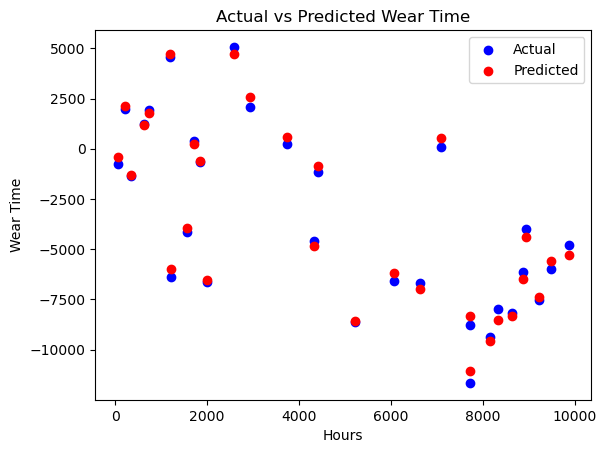

In [25]:
import matplotlib.pyplot as plt

def plot_feature_vs_target(X, y, feature_name):
    plt.scatter(X[feature_name], y, color='blue')
    plt.xlabel(feature_name)
    plt.ylabel('Wear Time')
    plt.title(f'Relationship between {feature_name} and Wear Time')
    plt.show()


for feature in ['Hours', 'Radiation', 'Temperature', 'Pressure']:
    plot_feature_vs_target(X, y, feature)

plt.scatter(X_test['Hours'], y_test, color='blue', label='Actual')
plt.scatter(X_test['Hours'], y_pred, color='red', label='Predicted')
plt.xlabel('Hours')
plt.ylabel('Wear Time')
plt.title('Actual vs Predicted Wear Time')
plt.legend()
plt.show()